# Crypto Assets Analysis: Bitcoin and Ethereum

This analysis scrutinizes Bitcoin and Ethereum  prices and their relationship 26 December 2018 between 25 Jan 2019. This time period was chosen due to the availability of data. (coingecko.com allows a free download of up to 30 days of hourly data.)
Although the data should be treated as high frequency data in the first part of this analysis the Data Set is assumed to come from a discrete data set.
In the second part, a continuous time analyis is applied
The third part is a comparision of the two forecasts

## Part 1

### Goal 1: Download data from the web

In [78]:
import requests
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import time 
from datetime import datetime
from IPython.display import Image
#time.strftime("%B %d %Y", 1545476402664)

### Get Crypto Asset Prices

Obtaining Bitcoin and Ethereum form coingecko.com:

In [2]:
bitcoinpath = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=eur&days=30"
ethereumpath = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=eur&days=30"

In [3]:
resultBtc = requests.get(bitcoinpath)
bit_prices = resultBtc.json()

resultEth = requests.get(ethereumpath)
eth_prices = resultEth.json()    

In [19]:
type(bit_prices)

dict

In [21]:
type(eth_prices)

dict

In [7]:
bit_prices_DF = pd.DataFrame(bit_prices['prices'])
bit_market_caps_DF = pd.DataFrame(bit_prices['market_caps'])
bit_total_volumes_DF = pd.DataFrame(bit_prices['total_volumes'])
#bit_prices_DF.rename(str.lower, axis='columns')
bit_prices_DF.rename(index=str, columns={0: "Datetime", 1: "Price €"})
bit_prices_DF.head(5)

,0,1
0,1545829207166,3299.317777
1,1545832867537,3296.115981
2,1545836404345,3250.939007
3,1545840017359,3250.100104
4,1545843603123,3293.721265


Creating the DataFrame for both Crypto Assets

In [8]:
CryptoAssetsDF = pd.DataFrame(bit_prices)
CryptoAssetsDF['DateTime'] = bit_prices_DF[0]
CryptoAssetsDF['Bitcoin_prices'] = bit_prices_DF[1]
CryptoAssetsDF['Bitcoin_market_caps'] = bit_market_caps_DF[1]
CryptoAssetsDF['Bitcoin_total_volumes'] = bit_total_volumes_DF[1]
CryptoAssetsDF.head(5)

,prices,market_caps,total_volumes,DateTime,Bitcoin_prices,Bitcoin_market_caps,Bitcoin_total_volumes
0,"[1545829207166, 3299.317776511968]","[1545829207166, 57607855055.18614]","[1545829207166, 3221406957.5640316]",1545829207166,3299.317777,5.760786e+10,3.221407e+09
1,"[1545832867537, 3296.115980762869]","[1545832867537, 57499546794.307236]","[1545832867537, 3208573550.4277396]",1545832867537,3296.115981,5.749955e+10,3.208574e+09
2,"[1545836404345, 3250.9390073525537]","[1545836404345, 56638058676.96007]","[1545836404345, 3286468428.964665]",1545836404345,3250.939007,5.663806e+10,3.286468e+09
3,"[1545840017359, 3250.100103618989]","[1545840017359, 56998175642.22725]","[1545840017359, 3123819915.4654717]",1545840017359,3250.100104,5.699818e+10,3.123820e+09
4,"[1545843603123, 3293.721264742601]","[1545843603123, 57513410740.68159]","[1545843603123, 3238689932.0807996]",1545843603123,3293.721265,5.751341e+10,3.238690e+09


In [9]:
CryptoAssetsDF.drop(columns=['prices', 'market_caps','total_volumes'], inplace = True)
CryptoAssetsDF.head()

,DateTime,Bitcoin_prices,Bitcoin_market_caps,Bitcoin_total_volumes
0,1545829207166,3299.317777,5.760786e+10,3.221407e+09
1,1545832867537,3296.115981,5.749955e+10,3.208574e+09
2,1545836404345,3250.939007,5.663806e+10,3.286468e+09
3,1545840017359,3250.100104,5.699818e+10,3.123820e+09
4,1545843603123,3293.721265,5.751341e+10,3.238690e+09


In [76]:
#resultEth= pd.DataFrame(resultEth['prices'])
eth_prices_DF = pd.DataFrame(eth_prices['prices'])
eth_market_caps_DF = pd.DataFrame(eth_prices['market_caps'])
eth_total_volumes_DF = pd.DataFrame(eth_prices['total_volumes'])

In [11]:
# adding the eth column to the Crypto Assets DF
# difference of two seconds is neglected 

CryptoAssetsDF['Ethereum_prices'] = eth_prices_DF[1]
CryptoAssetsDF['Ethereum_market_caps'] = eth_market_caps_DF[1]
CryptoAssetsDF['Ethereum_total_volumes'] = eth_total_volumes_DF[1]
CryptoAssetsDF.head(5)

,DateTime,Bitcoin_prices,Bitcoin_market_caps,Bitcoin_total_volumes,Ethereum_prices,Ethereum_market_caps,Ethereum_total_volumes
0,1545829207166,3299.317777,5.760786e+10,3.221407e+09,112.887511,1.173558e+10,2.408329e+09
1,1545832867537,3296.115981,5.749955e+10,3.208574e+09,113.149077,1.177307e+10,2.374975e+09
2,1545836404345,3250.939007,5.663806e+10,3.286468e+09,109.901727,1.143972e+10,2.384893e+09
3,1545840017359,3250.100104,5.699818e+10,3.123820e+09,108.991250,1.139371e+10,2.212336e+09
4,1545843603123,3293.721265,5.751341e+10,3.238690e+09,110.635260,1.151204e+10,2.293144e+09


In [12]:
from datetime import datetime
def DateTimeConverter(x):
    return datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S' )

ts = int("1545476402664")
ts2 = int("1545480002296")     
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S' ))
print(datetime.utcfromtimestamp(ts2/1000).strftime('%Y-%m-%d %H:%M:%S' ))


2018-12-22 11:00:02
2018-12-22 12:00:02


In [13]:
# converting DateTime
CryptoAssetsDF['UnixTime'] = CryptoAssetsDF['DateTime']
CryptoAssetsDF['DateTime'] = CryptoAssetsDF['UnixTime'].apply(DateTimeConverter)
CryptoAssetsDF.head(5)

,DateTime,Bitcoin_prices,Bitcoin_market_caps,Bitcoin_total_volumes,Ethereum_prices,Ethereum_market_caps,Ethereum_total_volumes,UnixTime
0,2018-12-26 13:00:07,3299.317777,5.760786e+10,3.221407e+09,112.887511,1.173558e+10,2.408329e+09,1545829207166
1,2018-12-26 14:01:07,3296.115981,5.749955e+10,3.208574e+09,113.149077,1.177307e+10,2.374975e+09,1545832867537
2,2018-12-26 15:00:04,3250.939007,5.663806e+10,3.286468e+09,109.901727,1.143972e+10,2.384893e+09,1545836404345
3,2018-12-26 16:00:17,3250.100104,5.699818e+10,3.123820e+09,108.991250,1.139371e+10,2.212336e+09,1545840017359
4,2018-12-26 17:00:03,3293.721265,5.751341e+10,3.238690e+09,110.635260,1.151204e+10,2.293144e+09,1545843603123


### Goal 2: Plot a time series

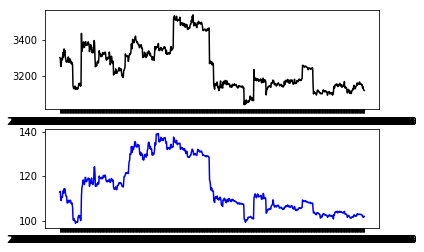

In [15]:
# Plot Bitcoin and Ethereum Prices
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(1)
plt.subplot(211)
plt.plot(CryptoAssetsDF['DateTime'], CryptoAssetsDF['Bitcoin_prices'].values,'k')   

plt.subplot(212)
plt.plot(CryptoAssetsDF['DateTime'], CryptoAssetsDF['Ethereum_prices'].values, 'b')
plt.show()

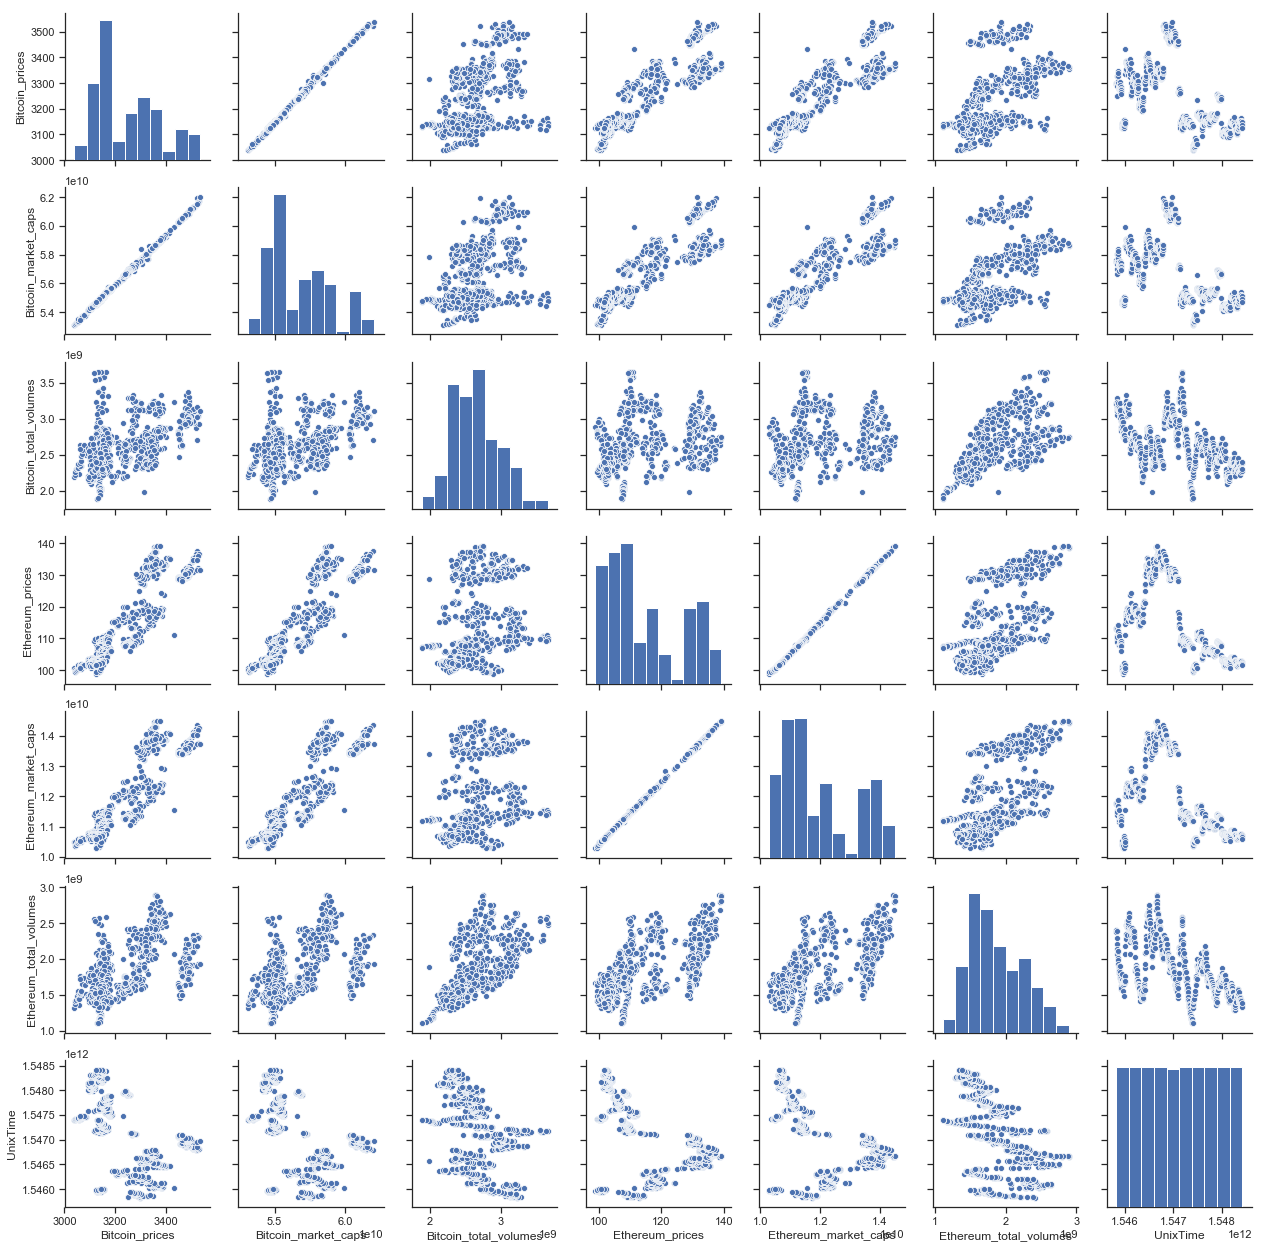

In [17]:
# the prices seem to have some co-movement
sns.set(style="ticks")
sns.pairplot(CryptoAssetsDF[:-2])

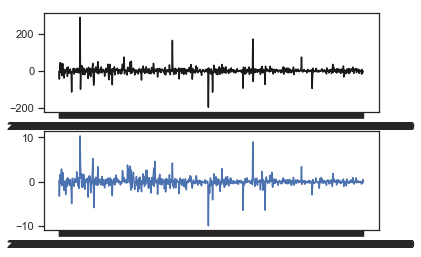

In [18]:
CryptoAssetsDF['Btc_Diff'] = CryptoAssetsDF['Bitcoin_prices'].diff()
CryptoAssetsDF['Eth_Diff'] = CryptoAssetsDF['Ethereum_prices'].diff()
plt.figure(1)
plt.subplot(211)
plt.plot(CryptoAssetsDF['DateTime'], CryptoAssetsDF['Btc_Diff'].values,'k')   
plt.subplot(212)
plt.plot(CryptoAssetsDF['DateTime'], CryptoAssetsDF['Eth_Diff'].values,'b')
plt.show()

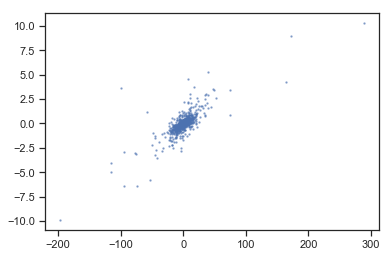

In [39]:
# Returns seems also to display some co-movement
plt.scatter( CryptoAssetsDF['Btc_Diff'], CryptoAssetsDF['Eth_Diff'],s=2,alpha=0.5 )

[-55, 55, -5, 5]

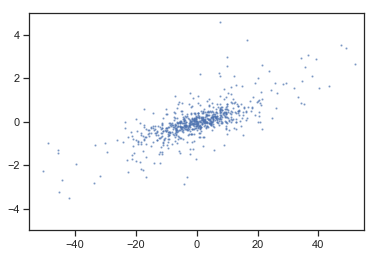

In [36]:
# "Zooming In"
plt.scatter( CryptoAssetsDF['Btc_Diff'], CryptoAssetsDF['Eth_Diff'],s=1.5,alpha=0.5 )
plt.axis([ -55, 55,-5, 5])

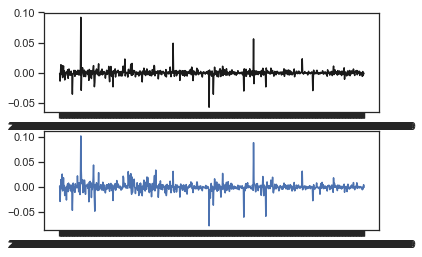

In [40]:
# Percentage Change - just in case
CryptoAssetsDF['Btc_pct_change'] = CryptoAssetsDF['Bitcoin_prices'].pct_change()
CryptoAssetsDF['Eth_pct_change'] = CryptoAssetsDF['Ethereum_prices'].pct_change()

plt.figure(1)
plt.subplot(211)
plt.plot(CryptoAssetsDF['DateTime'], CryptoAssetsDF['Btc_pct_change'].values,'k')   
#plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
#plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.plot(CryptoAssetsDF['DateTime'], CryptoAssetsDF['Eth_pct_change'].values,'b')
plt.show()

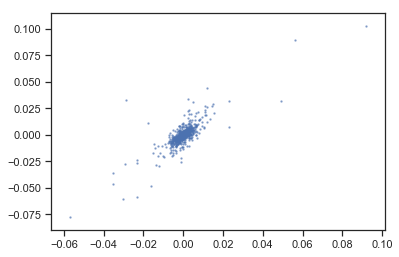

In [41]:
# Percentage Change seems also to display some co-movement
plt.scatter( CryptoAssetsDF['Btc_pct_change'], CryptoAssetsDF['Eth_pct_change'],s=2,alpha=0.5 )

[-0.02, 0.02, -0.04, 0.04]

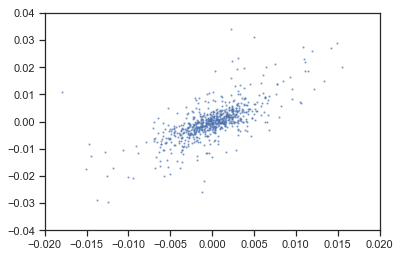

In [43]:
# "Zooming In"
plt.scatter( CryptoAssetsDF['Btc_pct_change'], CryptoAssetsDF['Eth_pct_change'],s=1.5,alpha=0.5 )
plt.axis([ -0.02, 0.02,-0.04, 0.04])

#### Checking for Stationarity and weak dependence

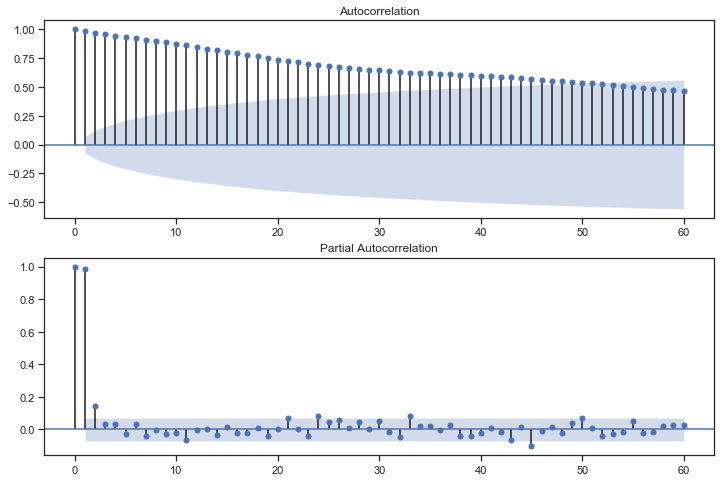

In [45]:
#bitcoin  - checking for acf and pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CryptoAssetsDF['Bitcoin_prices'].values.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CryptoAssetsDF['Bitcoin_prices'], lags=60, ax=ax2)

In [46]:
#ADF-Test
sm.tsa.stattools.adfuller(CryptoAssetsDF['Bitcoin_prices'], maxlag=None, regression='c',  autolag='AIC', regresults = True)


(-2.031621040692265,
 0.2728827439290262,
 {'1%': -3.439477677285233,
  '5%': -2.865568186630048,
  '10%': -2.5689150720653977},
 <statsmodels.tsa.stattools.ResultsStore at 0x1db1b7cd240>)

The high ACF values, significant up to 50th lag, in conjuction with high DF-Values close to H1 suggest that Bitcoin Prices might follow a long-memory process. To investigate this in more detail a Fractal Analysis would be necessary. To to the limited amount of time, Bitcoin prices are assumend to follow a Random Walk.

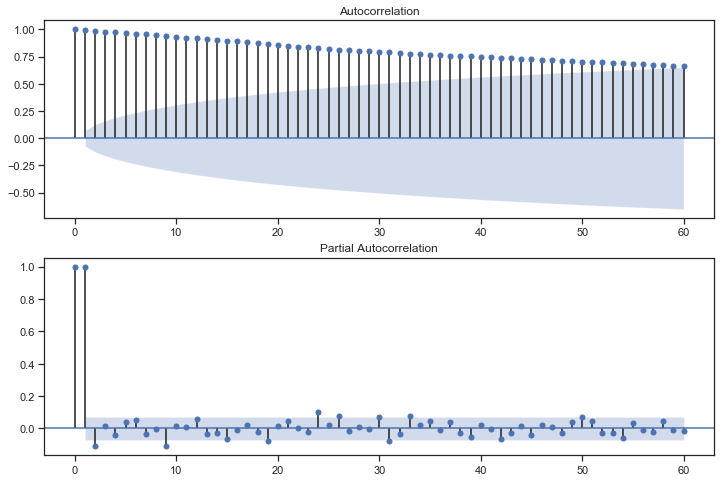

In [48]:
#ACF PACF ethereum
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CryptoAssetsDF['Ethereum_prices'].values.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CryptoAssetsDF['Ethereum_prices'], lags=60, ax=ax2)

In [49]:
#Dickey Fuller Tests
#ADF-Test Ethereum
sm.tsa.stattools.adfuller(CryptoAssetsDF['Ethereum_prices'], maxlag=None, regression='c',  autolag='AIC', regresults = True)

(-1.3024318345482448,
 0.6280590132976936,
 {'1%': -3.439477677285233,
  '5%': -2.865568186630048,
  '10%': -2.5689150720653977},
 <statsmodels.tsa.stattools.ResultsStore at 0x1db1bd27f60>)

Ethereum prices follow a Random Walk.

The prices of both assets are differenced and seem Order 1 Stationary ~ I(1). 

In [90]:
# dropping NaNs
y = CryptoAssetsDF['Btc_Diff'] 
y = y[1:]
x = CryptoAssetsDF['Eth_Diff']
x = x[1:]

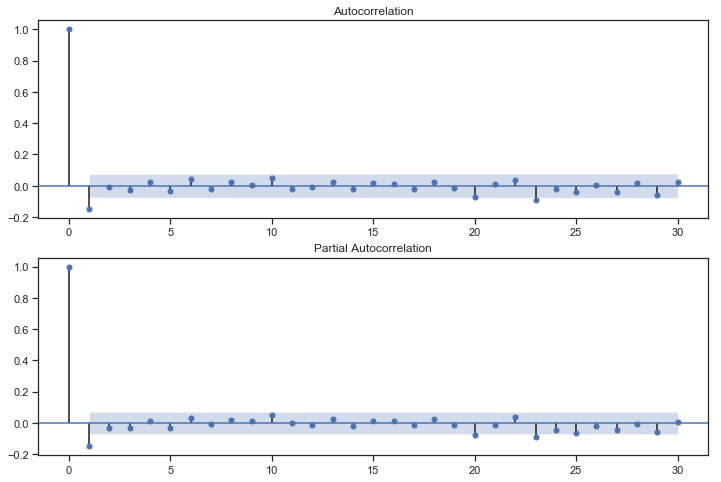

In [69]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=30, ax=ax2)

In [70]:
sm.tsa.stattools.adfuller(y, maxlag=None, regression='c',  autolag='AIC', regresults = True)

(-31.12290076180609,
 0.0,
 {'1%': -3.439477677285233,
  '5%': -2.865568186630048,
  '10%': -2.5689150720653977},
 <statsmodels.tsa.stattools.ResultsStore at 0x1db1bf39978>)

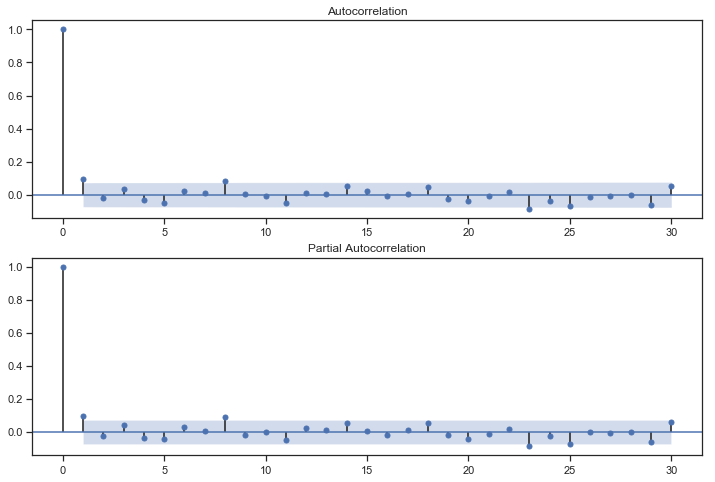

In [72]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x, lags=30, ax=ax2)

In [71]:
sm.tsa.stattools.adfuller(x, maxlag=None, regression='c',  autolag='AIC', regresults = True)

(-24.322637699347222,
 0.0,
 {'1%': -3.439477677285233,
  '5%': -2.865568186630048,
  '10%': -2.5689150720653977},
 <statsmodels.tsa.stattools.ResultsStore at 0x1db1d798c50>)

Returns of both assets (Btc_Diff and Eth_Diff) seem weak dependent and stationary

### Goal 3: Build Regression Model

In [106]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Btc_Diff   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1292.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          9.89e-163
Time:                        12:36:11   Log-Likelihood:                -2906.6
No. Observations:                 720   AIC:                             5815.
Df Residuals:                     719   BIC:                             5820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Eth_Diff      15.4205      0.429     35.943      0.0

In [109]:
model = sm.OLS(x, y)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Eth_Diff   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1292.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          9.89e-163
Time:                        12:36:45   Log-Likelihood:                -777.63
No. Observations:                 720   AIC:                             1557.
Df Residuals:                     719   BIC:                             1562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Btc_Diff       0.0417      0.001     35.943      0.0

Although the R-squared in both regression are the same, all Information Criteria (Log-Lkh, AIC, BIC) strongly suggest, that Bitcoins has an influence on Ethereum. This seems reasonable, given that Bitcoin has more then five times the market capitalization of Ethereum (see Graphic below). 
Further, it should be noted that looking at the JB-Test the returns are not normally distributed.


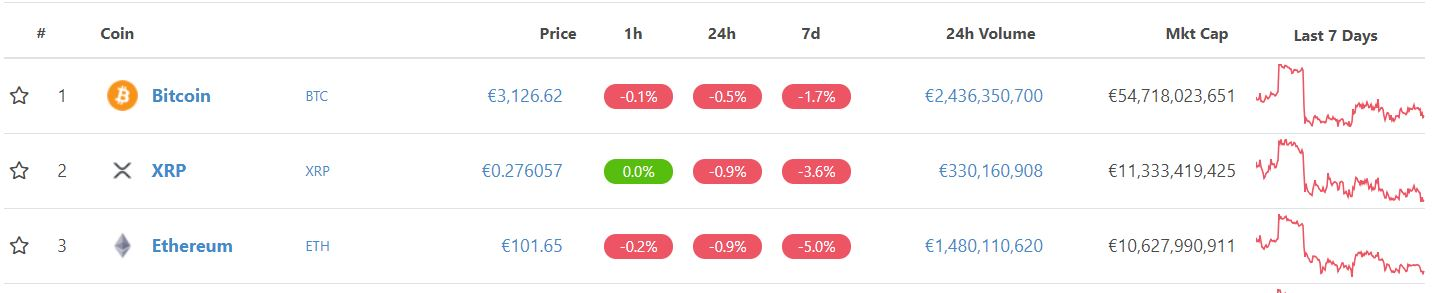

In [82]:
Image(filename = "CryptoMarketCap.jpg") 

### Goal 4: Apply regularization

Scale Data

In [117]:
from sklearn.preprocessing import StandardScaler
#create constant 
#ones = array len(x)
Y = pd.DataFrame(y.values, columns = ['Bit_Diff'])
Y['Const'] = 1

In [119]:
Y.head()

,Bit_Diff,Const
0,-3.201796,1
1,-45.176973,1
2,-0.838904,1
3,43.621161,1
4,3.268946,1


In [120]:
scaler = StandardScaler()
#x1 = scaler.fit_transform(x)
Y1 = scaler.fit_transform(Y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#regression with Ridge R2 
m2 = LinearRegression(fit_intercept=True,normalize=True) #'C=1.0'
m2.fit( Y1,x)
m2.score(Y1, x)

0.6424041026625702

In [163]:
m2.coef_[0]

0.9550271420476637

Regularization does not seem to have an effect.

### Goal 5: Apply Gradient Descent

### Goal 6: Present a Python package

In [ ]:
statsmodel

### Goal 8: Predict Prices

Due to lack of time, a simple unconditional mean was chosen for both Assets:

In [87]:

CryptoAssetsDF['Bitcoin_prices'].mean(),CryptoAssetsDF['Ethereum_prices'].mean()

(3245.8197655854237, 114.7284935527805)

In [ ]:
# check cointegration between Bitcoin and Ehtereum Prices

## Part2

## Part3
### Comparision